In [1]:
!pip install textblob

In [2]:
from textblob import TextBlob
from textblob import Word
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
st = ['i love cats', 'people are great', 'i see the world as a better place', 'the food is really bad', 'people like themselves',
     'lots of violence nowadays']

In [4]:
df = pd.DataFrame(st, columns=['Statement'])

In [5]:
df

,Statement
0,i love cats
1,people are great
2,i see the world as a better place
3,the food is really bad
4,people like themselves
5,lots of violence nowadays


In [6]:
for sent in st:
    y = TextBlob(sent)
    print(y.sentiment)

Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


In [7]:
def get_polarity(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return sentiment.polarity

In [8]:
df['polarity'] = df['Statement'].apply(get_polarity)

In [9]:
df

,Statement,polarity
0,i love cats,0.5
1,people are great,0.8
2,i see the world as a better place,0.5
3,the food is really bad,-0.7
4,people like themselves,0.0
5,lots of violence nowadays,0.0


In [10]:
def find_sentiments(text):
    if get_polarity(text) > 0:
        return 'Positive'
    elif get_polarity(text) == 0:
        return 'Neutral'
    elif get_polarity(text) < 0:
        return 'Negative'
    else:
        return 'none'

In [11]:
df['sentiment'] = df['Statement'].apply(find_sentiments)

In [12]:
df

,Statement,polarity,sentiment
0,i love cats,0.5,Positive
1,people are great,0.8,Positive
2,i see the world as a better place,0.5,Positive
3,the food is really bad,-0.7,Negative
4,people like themselves,0.0,Neutral
5,lots of violence nowadays,0.0,Neutral


In [13]:
df['sentiment'].value_counts()

Positive    3
Neutral     2
Negative    1
Name: sentiment, dtype: int64

In [14]:
df['polarity'].value_counts()

 0.0    2
 0.5    2
 0.8    1
-0.7    1
Name: polarity, dtype: int64

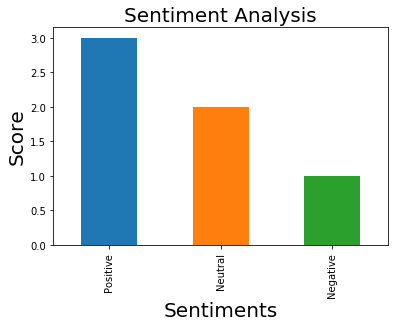

In [15]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('Sentiments',fontsize=20)
plt.ylabel('Score', fontsize=20)
plt.show()